In [17]:
# Importing required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [18]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)  # Placeholder; this will be updated dynamically
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = torch.flatten(x, start_dim=1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def initialize_fc1(self, input_shape):
        dummy_input = torch.zeros(1, *input_shape)
        x = torch.relu(self.conv1(dummy_input))
        x = torch.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        flattened_size = x.numel()
        self.fc1 = nn.Linear(flattened_size, 128)


In [19]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [20]:
# Define a function to train and evaluate the model with tqdm logging
def train_and_evaluate(optimizer_name, optimizer_fn):
    model = CNN()
    model.initialize_fc1(input_shape=(1, 28, 28))  # Initialize fc1 dynamically
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_fn(model.parameters())
    num_epochs = 5

    train_loss = []
    test_accuracy = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        print(f"\nEpoch {epoch + 1}/{num_epochs} - Training with {optimizer_name}")
        with tqdm(total=len(train_loader), desc="Training", leave=False) as pbar:
            for images, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
                pbar.update(1)

        train_loss.append(epoch_loss / len(train_loader))

        # Evaluate on test data
        model.eval()
        correct = 0
        total = 0
        with tqdm(total=len(test_loader), desc="Testing", leave=False) as pbar:
            with torch.no_grad():
                for images, labels in test_loader:
                    outputs = model(images)
                    _, predicted = torch.max(outputs, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    pbar.update(1)
        test_accuracy.append(correct / total)
        print(f"Epoch {epoch + 1}/{num_epochs} - Loss: {train_loss[-1]:.4f}, Accuracy: {test_accuracy[-1]:.4f}")

    return train_loss, test_accuracy


In [21]:
# Optimizers to compare
optimizers = {
    "SGD": lambda params: optim.SGD(params, lr=0.01),
    "Momentum": lambda params: optim.SGD(params, lr=0.01, momentum=0.9),
    "Nesterov": lambda params: optim.SGD(params, lr=0.01, momentum=0.9, nesterov=True),
    "RMSProp": lambda params: optim.RMSprop(params, lr=0.01)
}

In [22]:
# Train and collect results with tqdm
results = {}
for name, optimizer_fn in optimizers.items():
    print(f"\nTraining with {name} optimizer...")
    train_loss, test_accuracy = train_and_evaluate(name, optimizer_fn)
    results[name] = {"train_loss": train_loss, "test_accuracy": test_accuracy}

Training with SGD optimizer...

Epoch 1/5 - Training with SGD


Epoch 1/5 - Loss: 0.6065, Accuracy: 0.9194

Epoch 2/5 - Training with SGD


Epoch 2/5 - Loss: 0.2178, Accuracy: 0.9549

Epoch 3/5 - Training with SGD


Epoch 3/5 - Loss: 0.1354, Accuracy: 0.9701

Epoch 4/5 - Training with SGD


Epoch 4/5 - Loss: 0.0952, Accuracy: 0.9768

Epoch 5/5 - Training with SGD


Epoch 5/5 - Loss: 0.0738, Accuracy: 0.9779
Training with Momentum optimizer...

Epoch 1/5 - Training with Momentum


Epoch 1/5 - Loss: 0.2115, Accuracy: 0.9808

Epoch 2/5 - Training with Momentum


Epoch 2/5 - Loss: 0.0511, Accuracy: 0.9876

Epoch 3/5 - Training with Momentum


Epoch 3/5 - Loss: 0.0329, Accuracy: 0.9876

Epoch 4/5 - Training with Momentum


Epoch 4/5 - Loss: 0.0235, Accuracy: 0.9896

Epoch 5/5 - Training with Momentum


Epoch 5/5 - Loss: 0.0168, Accuracy: 0.9897
Training with Nesterov optimizer...

Epoch 1/5 - Training with Nesterov


Epoch 1/5 - Loss: 0.2081, Accuracy: 0.9830

Epoch 2/5 - Training with Nesterov


Epoch 2/5 - Loss: 0.0494, Accuracy: 0.9850

Epoch 3/5 - Training with Nesterov


Epoch 3/5 - Loss: 0.0319, Accuracy: 0.9885

Epoch 4/5 - Training with Nesterov


Epoch 4/5 - Loss: 0.0229, Accuracy: 0.9875

Epoch 5/5 - Training with Nesterov


Epoch 5/5 - Loss: 0.0160, Accuracy: 0.9899
Training with RMSProp optimizer...

Epoch 1/5 - Training with RMSProp


Epoch 1/5 - Loss: 11.5604, Accuracy: 0.8351

Epoch 2/5 - Training with RMSProp


Epoch 2/5 - Loss: 0.1957, Accuracy: 0.9738

Epoch 3/5 - Training with RMSProp


Epoch 3/5 - Loss: 0.0764, Accuracy: 0.9790

Epoch 4/5 - Training with RMSProp


Epoch 4/5 - Loss: 0.0670, Accuracy: 0.9784

Epoch 5/5 - Training with RMSProp


Epoch 5/5 - Loss: 0.0593, Accuracy: 0.9815


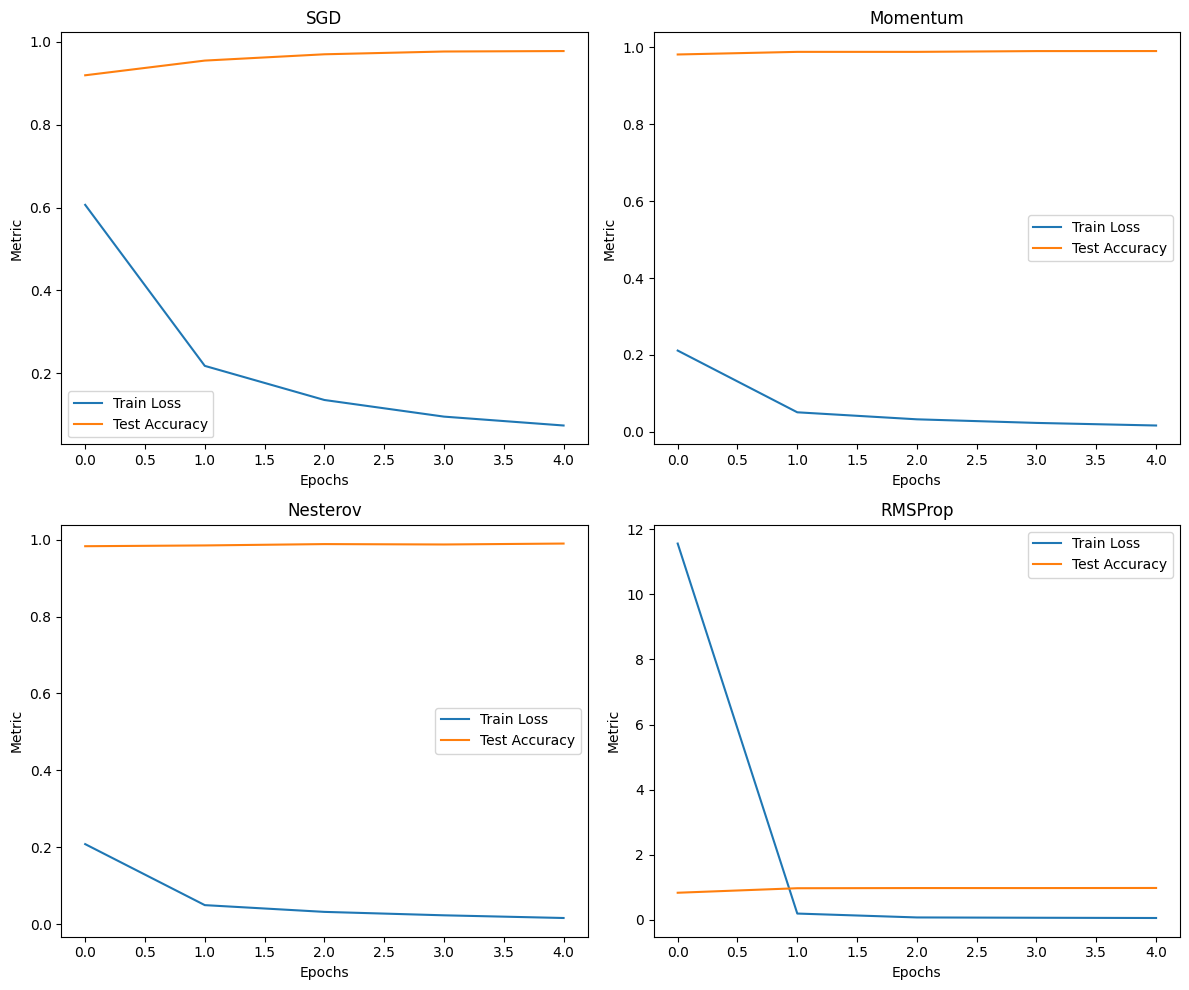

In [23]:
# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for idx, (name, result) in enumerate(results.items()):
    axes[idx].plot(result["train_loss"], label="Train Loss")
    axes[idx].plot(result["test_accuracy"], label="Test Accuracy")
    axes[idx].set_title(name)
    axes[idx].legend()
    axes[idx].set_xlabel("Epochs")
    axes[idx].set_ylabel("Metric")
plt.tight_layout()
plt.show()

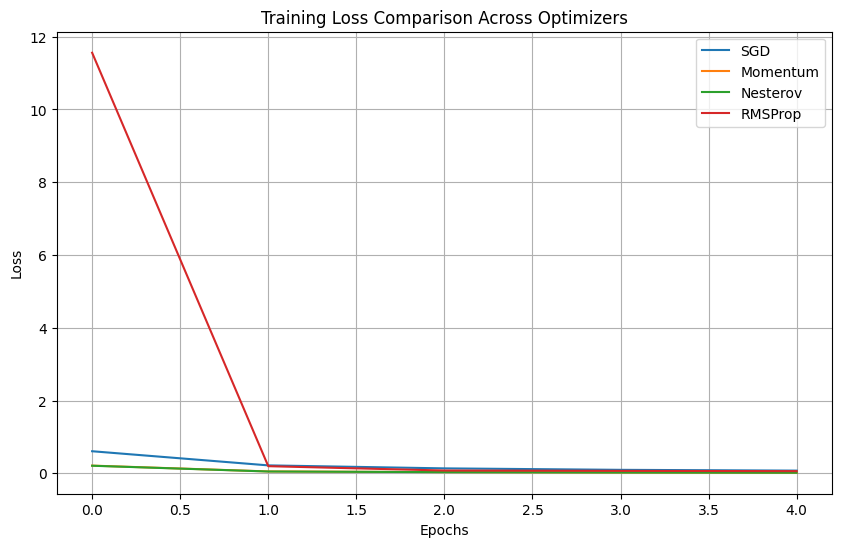

In [24]:
# Plot combined training loss comparison
plt.figure(figsize=(10, 6))

for name, result in results.items():
    plt.plot(result["train_loss"], label=name)

plt.title("Training Loss Comparison Across Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()